# Ch05. 기러기 스위스 같은 회문 체크하기


## 1. apply 함수를 사용하는 이유

**feature engineering**

- 기존 데이터로 더 유용한 새로운 특성(feature)을 만드는 것

- 이제까지 배운 함수만으로 모든 feature engineering을 할 수 없다

- 이럴때 `apply`의 도움이 필요하다


**apply**

- 함수를 적용하게 해주는 함수

- 데이터 프레임이나 시리즈에 직접 적용이 안되는 함수 (ex 파이썬 함수, 사용자 정의 함수) 들을 적용하게 해준다

In [3]:
#실습 준비 코드
import pandas as pd
list1 = ['mom', 'get', 'pandas', 'level']
s1 = pd.Series(list1)
s2 = pd.Series(['1', '2', '3'])
s1

0       mom
1       get
2    pandas
3     level
dtype: object

In [4]:
print(list1)
print(len(list1)) # 리스트에 len이 적용되지 리스트의 원소에 적용되지 않는다

# 리스트안의 원소에게 len 함수를 적용하려면 파이썬에서도 map 함수가 필요
print(list(map(len, list1)))

['mom', 'get', 'pandas', 'level']
4
[3, 3, 6, 5]


리스트의 개별 원소에 `len` 함수를 적용하려면 `map` 함수의 도움이 필요하듯, 판다스에서도 데이터 프레임이나 시리즈에 적용되지 않는 함수를 적용하려면 `apply`의 도움이 필요하다

In [5]:
# s1의 각 셀에서 문자열의 길이를 반환한 시리즈를 만들자
s1.apply(len)

0    3
1    3
2    6
3    5
dtype: int64

`len`은 문자열의 길이를 반환하는 파이썬 함수이고 그 함수를 각 셀에 적용하려면 `apply`의 도움이 필요하다

이번에는 시리즈 s2를 정수로 바꾸자 `astype`으로 바꿀 수 있지만 `astype`을 모른다고 가정해보자 그렇다면 파이썬의 함수 `int`를 사용해야 한다

In [6]:
# s2의 각 셀의 자료형을 정수(int)로 바꾸자. 파이썬 함수 int를 이용하자
s2.apply(int)

0    1
1    2
2    3
dtype: int64

`int`는 정수로 바꾸는 파이썬 함수이고 그 함수를 각 셀에 적용하려면 `apply`의 도움이 필요하다

In [7]:
# 판다스 함수 astype로도 당연히 가능하다
s2.astype('int')

0    1
1    2
2    3
dtype: int32

## 2. 시리즈에 apply 사용하기

### 학습 목표
- 시리즈에 파이썬 함수를 적용한다. (`apply` 함수)

> pandas apply

<img src=https://i.ibb.co/cNcNXP4/05-01.png, width=600>



데이터 프레임이나 시리즈의 개별 요소 각각에 함수를 적용해주는 함수

데이터 프레임은 시리즈 단위로 함수를 적용하고, 시리즈는 셀단위로 함수를 적용한다

------

**func** (인수는 함수)

개별 요소에 적용할 함수를 입력하는 인자

 

**axis**  (인수는 0 or  1 / 기본값은 0)

데이터 프레임에 apply를 적용하면 시리즈별로 함수를 적용되는데 그 때 개별 시리즈를 결정하는 축을 지정하는 인자

- 0 : 열마다 함수를 적용한다
- 1 : 행마다 함수를 적용한다

<br><br>

[apply 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [8]:
# 실습 준비 코드
import pandas as pd
data = [['차은우', 'mom'], ['송중기', 'get'], 
        ['카리나', 'pandas'], ['이상윤', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df

,이름,답안
0,차은우,mom
1,송중기,get
2,카리나,pandas
3,이상윤,level


df는 각 사람이 제출한 답안 데이터이다. 문제는 아래와 같다.


**문제**
> 5글자 이상의 회문을 답하라

정답자를 찾아보자 (회문은 기러기처럼 거꾸로 뒤집어도 같은 단어가 되는 것을 의미한다)

In [9]:
# 답안의 글자수 파악하기
df['답안'].apply(len)

0    3
1    3
2    6
3    5
Name: 답안, dtype: int64

In [10]:
# 답안의 글자수를 글자수 열로 만들어보자
df['글자수'] = df['답안'].apply(len)
df

,이름,답안,글자수
0,차은우,mom,3
1,송중기,get,3
2,카리나,pandas,6
3,이상윤,level,5


## 3. apply로 시리즈에 사용자 정의함수 적용하기

### 학습 목표
- 시리즈에 사용자 정의 함수를 적용한다. (`apply` 함수)
- 사용자 정의 함수를 `lambda` 함수로 정의한다.

In [11]:
# 실습 준비 코드
import pandas as pd
data = [['차은우', 'mom'], ['송중기', 'get'], 
        ['카리나', 'pandas'], ['이상윤', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df['글자수'] = df['답안'].apply(len)
df

,이름,답안,글자수
0,차은우,mom,3
1,송중기,get,3
2,카리나,pandas,6
3,이상윤,level,5


답안의 문자열을 역순으로 뒤집은 역순열을 만들어 보자

In [12]:
# 문자열을 역순으로 뒤집는 사용자 정의 함수 만들기
def rev1(x):
  return x[::-1]
rev1('get')

'teg'

In [13]:
# apply로 사용자 정의함수 적용하기
df['역순'] = df['답안'].apply(rev1)
df

,이름,답안,글자수,역순
0,차은우,mom,3,mom
1,송중기,get,3,teg
2,카리나,pandas,6,sadnap
3,이상윤,level,5,level


In [14]:
# lambda 함수로 사용자 정의 함수 만들기. rev1과 rev2는 같은 함수이다
def rev1(x):
  return x[::-1]
print(rev1('get'))

rev2 = lambda x: x[::-1]
print(rev2('get'))

teg
teg


In [15]:
# lambda 함수로 사용자 정의 함수 만들어 apply로 적용하기
df['역순'] = df['답안'].apply(lambda x: x[::-1])
df

,이름,답안,글자수,역순
0,차은우,mom,3,mom
1,송중기,get,3,teg
2,카리나,pandas,6,sadnap
3,이상윤,level,5,level


**lambda 함수 쉽게 만드는 방법**

<img src=https://i.ibb.co/3R6Wdsc/05-04.jpg, width=600>

## 4. 다중요건 불리언 인덱싱

### 학습 목표
- 복수의 조건문을 논리연산자로 연산한다.

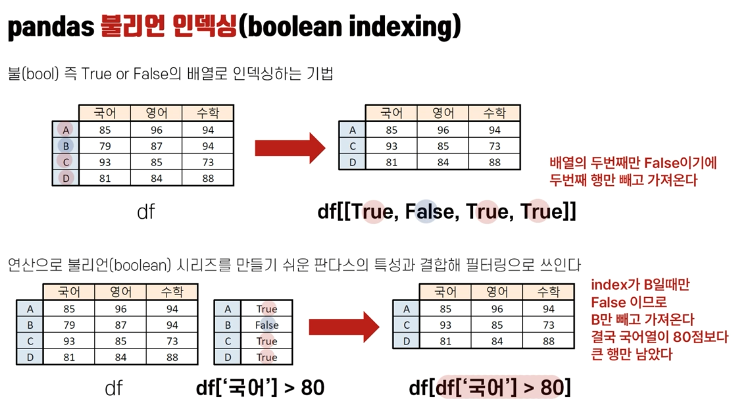

여러개의 조건문으로 필터링을 하려면 조건문을 논리연산해야 한다

In [16]:
# 실습 준비 코드
import pandas as pd
data = [['차은우', 'mom'], ['송중기', 'get'], 
        ['카리나', 'pandas'], ['이상윤', 'level']]
df = pd.DataFrame(data, columns=['이름', '답안'])
df['글자수'] = df['답안'].apply(len)
df['역순'] = df['답안'].apply(lambda x: x[::-1])

df1 = pd.DataFrame([[71, 82], [91, 85], [81, 92]], 
                   index=list('ABC'), columns=['국어', '영어'])

다중 요건 조건문을 만들어 보자
- 국어 점수가 80점보다 높고 국어 점수가 영어점수보다 낮은 사람

In [17]:
df1

,국어,영어
A,71,82
B,91,85
C,81,92


In [18]:
# 국어점수가 80점보다 높은 사람
df1['국어'] > 80

A    False
B     True
C     True
Name: 국어, dtype: bool

In [19]:
# 국어보다 영어를 잘하는 사람. 비교연산도 인덱스에 맞춰서 연산한다
df1['국어'] < df1['영어']

A     True
B    False
C     True
dtype: bool

<img src=https://i.ibb.co/N1wt9tP/05-04.png, width=400>

In [20]:
# 국어 점수가 80점보다 높고 영어점수보다 낮은 사람을 찾는 조건문
cond1 = df1['국어'] > 80
cond2 = df1['국어'] < df1['영어']
cond1 & cond2

A    False
B    False
C     True
dtype: bool

판다스의 논리연산에는 반드시 논리연산자를 사용해야 한다

and, or, not을 사용하면 에러가 발생한다


```python
cond1 and cond2
```



> ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()

In [21]:
# 위 조건문으로 불리언 인덱싱
df1[cond1 & cond2]

,국어,영어
C,81,92


**df에서 글자수가 5이상인 회문을 답변한 사람을 찾아라**

- 거꾸로 해도 원래 단어와 같은 단어나 문장을 회문이라고 한다
- 불리언 인덱싱(boolean indexing)을 사용하면 되지만 조건이 두개 즉 복수인 경우이다
- 앞서 배운 논리 연산자를 이용해 여러개의 조건문을 연산해 조건문을 만들면 해결 된다

In [22]:
df

,이름,답안,글자수,역순
0,차은우,mom,3,mom
1,송중기,get,3,teg
2,카리나,pandas,6,sadnap
3,이상윤,level,5,level


In [23]:
# 글자수가 5이상인 회문을 답변한 사람
cond1 = df['글자수'] >= 5
cond2 = df['답안'] == df['역순']
df[cond1 & cond2]

,이름,답안,글자수,역순
3,이상윤,level,5,level


## 5. 프로젝트



`05_01_palindrome.csv` 파일에서 3글자의 회문인 정답을 찾고, 정답자의 소속 시도(광역단체)를 파악하라

In [24]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = './05_01_palindrome.csv'
df_ex1 = pd.read_csv(url)
df_ex1

,이름,주소,답안
0,류동영,경상북도 청도군 뒷마2길,메뉴
1,유지수,경상북도 문경시 청암3길,목욕탕
2,권민식,경기도 안양시 동안구 동편로49번길,야채
...,...,...,...
997,한성균,부산광역시 영도구 청학북로,스웨터
998,양대환,강원도 춘천시 하중도길,남북
999,이종봉,충청북도 단양군 여울목2길,해외여행


**주소 열로 시도 열을 만들자**

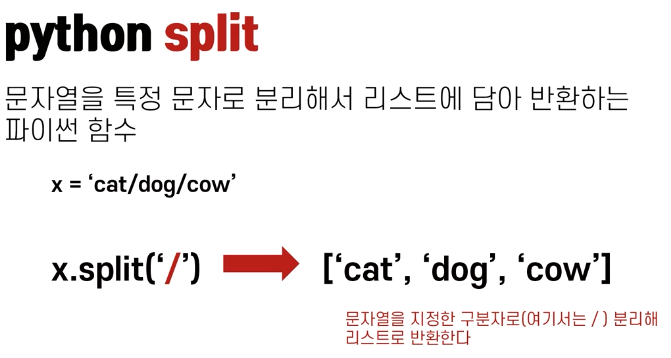

In [25]:
# lambda 함수 쉽게 만드는 법
x = '경상북도 청도군 뒷마2길'
x.split(' ')[0] # 이 코드를 lambda x: 다음에 넣으면 된다

'경상북도'

In [26]:
# 주소 열로 시도를 구분하는 열 만들기
df_ex1['시도'] = df_ex1['주소'].apply(lambda x:x.split(' ')[0])
df_ex1

,이름,주소,답안,시도
0,류동영,경상북도 청도군 뒷마2길,메뉴,경상북도
1,유지수,경상북도 문경시 청암3길,목욕탕,경상북도
2,권민식,경기도 안양시 동안구 동편로49번길,야채,경기도
...,...,...,...,...
997,한성균,부산광역시 영도구 청학북로,스웨터,부산광역시
998,양대환,강원도 춘천시 하중도길,남북,강원도
999,이종봉,충청북도 단양군 여울목2길,해외여행,충청북도


In [27]:
# 불리언 인덱싱의 조건문1. 답안이 세글자이다
cond1 = df_ex1['답안'].apply(len) == 3
cond1

0      False
1       True
2      False
       ...  
997     True
998    False
999    False
Name: 답안, Length: 1000, dtype: bool

In [28]:
# 불리언 인덱싱의 조건문2. 답안이 회문이다
cond2 = df_ex1['답안'].apply(lambda x: x[::-1]) == df_ex1['답안']
cond2

0      False
1      False
2      False
       ...  
997    False
998    False
999    False
Name: 답안, Length: 1000, dtype: bool

In [29]:
# 정답은 cond1과 cond2를 모두 만족시켜야 하므로 & 조건이다
cond1 & cond2

0      False
1      False
2      False
       ...  
997    False
998    False
999    False
Name: 답안, Length: 1000, dtype: bool

In [30]:
# 정답만을 필터링
df_ex1[cond1 & cond2]

,이름,주소,답안,시도
35,강승주,서울특별시 용산구 독서당로29길,기러기,서울특별시
41,백서하,인천광역시 강화군 교동북로169번길,토마토,인천광역시
57,오우진,서울특별시 노원구 동일로193길,스위스,서울특별시
617,정성빈,경기도 성남시 분당구 발이봉로11번길,인도인,경기도
917,차용석,강원도 횡성군 수남로108번길,별똥별,강원도


In [31]:
# 정답자의 시도를 집계하자
df_ex1.loc[cond1 & cond2, '시도'].value_counts()
#loc(조건, 추출하려는 열)

시도
서울특별시    2
인천광역시    1
경기도      1
강원도      1
Name: count, dtype: int64

## 6. 문자열 다루기

### 학습 목표
- 파이썬의 문자열 함수들을 시리즈에 적용한다. (`apply` 함수)
- 판다스의 문자열 함수들을 사용한다.

우리는 문자열을 다루는 판다스 함수를 아직 알지 못해서 apply 함수로 파이썬의 문자열 함수를 적용했다 

판다스도 문자열을 다루는 함수들이 있다

> 판다스 문자열 다루는 함수들의 특징

- str 접근자를 사용한다
- 시리즈에만 적용된다
- 대체로 기본값으로 정규표현식을 사용할 수 있다

In [32]:
# 실습 준비 코드
import pandas as pd
data = [['mom', 'cat01', 'cat-01', '   cat', 'cat01'], 
        ['get', 'dog02', 'dog-01', '  dog', '01cat'], 
        ['pandas', 'cow01', 'rabbit-01', ' cow', 'dog01'], 
        ['level', 'cow02', 'dog-02',  'cow', 'cow01']]
df = pd.DataFrame(data, columns=list('ABCDE'))
df

,A,B,C,D,E
0,mom,cat01,cat-01,cat,cat01
1,get,dog02,dog-01,dog,01cat
2,pandas,cow01,rabbit-01,cow,dog01
3,level,cow02,dog-02,cow,cow01


apply로 파이썬의 문자열 함수를 사용하는 경우와 판다스의 문자열 함수를 사용하는 경우를 모두 실행하니까 결과를 비교해보자

In [33]:
# A열의 문자열의 길이
print(df['A'].apply(len))
print('\n') # 줄바꿈
print(df['A'].str.len()) #apply와 같은 기능을 하는 pandas함수

0    3
1    3
2    6
3    5
Name: A, dtype: int64


0    3
1    3
2    6
3    5
Name: A, dtype: int64


In [34]:
# B열에서 각 셀마다 앞의 세글자만 슬라이싱
print(df['B'].apply(lambda x: x[:3]))
print('\n') # 줄바꿈
print(df['B'].str[:3])

0    cat
1    dog
2    cow
3    cow
Name: B, dtype: object


0    cat
1    dog
2    cow
3    cow
Name: B, dtype: object


In [35]:
# C열에서 각 셀마다 - 앞 부분을 가져오기
print(df['C'].apply(lambda x: x.split('-')[0]))
print('\n') # 줄바꿈
print(df['C'].str.split('-').str[0])

0       cat
1       dog
2    rabbit
3       dog
Name: C, dtype: object


0       cat
1       dog
2    rabbit
3       dog
Name: C, dtype: object


In [36]:
# D열에서 각 셀마다 cat 포함여부를 bool로 만들기 - 판다스 문자열 함수만
df['D'].str.contains('cat')

0     True
1    False
2    False
3    False
Name: D, dtype: bool

정규 표현식에서 

```python
r'cat|dog'
```
위는 cat 또는 dog를 의미한다



In [37]:
# D열에서 cat 또는 dog 포함여부를 bool로 만들기 - 정규표현식
df['D'].str.contains(r'cat|dog')

0     True
1     True
2    False
3    False
Name: D, dtype: bool

In [38]:
# E열에서 각 셀마다 cat 포함여부를 bool로 만들기 - 판다스 문자열 함수만
df['E'].str.contains(r'cat|dog')

0     True
1     True
2     True
3    False
Name: E, dtype: bool

`str.extract` 함수는 반드시 문자열 안에 소괄호로 그룹핑(grouping)을 해야한다

In [39]:
# E열에서 cat을 가지고 있다면 cat을 추출하기
df['E'].str.extract('(cat)') #extract함수는 소괄호로 감싸주기

,0
0,cat
1,cat
2,NaN
3,NaN


In [ ]:
# E열에서 cat 또는 dog를 가지고 있다면 해당 문자열을 추출하기 - 정규표현식
df['E'].str.extract(r'(cat|dog)')

## 7. 숫자형 자료형으로 바꾸기(to_numeric)

### 학습 목표
- `astype`이 아닌 `to_numeric`을 쓰는 이유를 이해한다.
- `to_numeric` 함수의 에러 처리 방식을 학습한다. (`error` 인자)

In [ ]:
# 실습 준비 코드
import pandas as pd
s1 = pd.Series(['87', '70', '98', '-'])
s1

s1의 자료형을 정수로 바꾸려고 `astype`을 사용하면 에러가 발생한다

```python
s1.astype('int')
```


> ValueError: invalid literal for int() with base 10: '-'


- `astype`은 숫자로 바꿀 수 없는 문자열이 끼어있는 시리즈를 숫자로 바꿀 수 없다

- 이때는 `pd.to_numeric` 함수를 사용해야 한다

In [ ]:
# to_numeric의 errors='coerce'는 바꿀 수 없으면 NaN으로 변환한다
pd.to_numeric(s1, errors='coerce')

In [ ]:
# errors='ignore'는 바꿀 수 없으면 전체를 바꾸지 않고 그대로 돌려준다
pd.to_numeric(s1, errors='ignore')

## 8. 데이터 프레임에 apply 사용하기

### 학습 목표
- `apply` 함수를 데이터 프레임에 적용한다.
- `apply` 함수를 적용할 때 축의 의미를 이해한다. (`axis` 인자)

<img src=https://i.ibb.co/BgJ7hL7/05-08.jpg, width=600>

In [ ]:
# 실습 준비 코드
import pandas as pd
s1 = pd.Series(['87', '70', '98', '-'])
data1 = [['87', '-', '70'], ['70', '72', '73'], 
         ['98', '76', '-'], ['-', '77', '95']]
data2 = [[87, 99, 70], [70, 72, 73], [98, 76, 80], [93, 77, 95]]
df1 = pd.DataFrame(data1, index=list('ABCD'), columns=['국어', '영어', '수학'])
df2 = pd.DataFrame(data2, index=list('ABCD'), columns=['국어', '영어', '수학'])

data3 = [['차은우', 'A', '할인'], ['송중기', 'B', '할인'], 
         ['카리나', 'C', '할인'], ['안유진', 'C', '할인'], 
         ['이상윤', 'A', '정상가'], ['박효신', 'A', '정상가']]

df3 = pd.DataFrame(data3, columns=['이름', '제품', '할인여부'])
df4 = pd.DataFrame([[5000, 4000], [1200, 1000], [2000, 1500]], 
                   index=list('ABC'), columns=['정상가', '할인'])

**s1을 숫자형 자료형으로 바꾸어라**
- `astype`으로는 '-'을 숫자로 바꿀 수 없기때문에 불가능하다 
- `pd.to_numeric` 함수를 사용하면 숫자로 바꿀 수 없는 값은 NaN으로 바꿀 수 있다(`errors='coerce'`)
- `pd.to_numeric` 함수는 시리즈에만 사용가능한 함수이다 (데이터프레임에는 불가)

In [ ]:
s1

In [ ]:
pd.to_numeric(s1, errors='coerce')

**데이터 프레임인 df1을 숫자형으로 바꾸어라** 
- 시리즈에만 적용되는 `pd.to_numeric` 함수를 `apply`로 데이터 프레임 전체에 적용하면 된다

In [ ]:
df1

In [ ]:
# 시리즈에만 적용되는 pd.to_numeric을 데이터프레임에 적용하려면 apply가 필요
df1.apply(pd.to_numeric, errors='coerce')

In [ ]:
# 자료형이 잘 바뀐건지 확인
df1.apply(pd.to_numeric, errors='coerce').info()

**데이터 프레임에 apply를 적용할 때 축에 따라 다르게 적용된다**

In [ ]:
df2

In [ ]:
# 데이터 프레임에 apply를 적용할 때 축에 따라 다르게 적용된다
print(df2.apply(sum))
print('\n') # 줄바꿈
print(df2.apply(sum, axis=1))

위 예시에 `sum`을 이용한 것은  축에 따른 `apply`를 여러분께 보여주기 위한 것이다 

`sum`은 데이터프레임에 적용하면 시리즈 별로 적용하는 함수이므로 굳이 `apply`와 적용할 필요가 없다

In [ ]:
# sum은 apply가 필요한 함수는 아니다
print(df2.sum())
print('\n') # 줄바꿈
print(df2.sum(axis=1)) 

축에 따라 달리 적용되는 것을 더 명확하게 확인하기 위해 시리즈를 슬라이싱하는 사용자 정의 함수를 만들자

In [ ]:
# axis=0일 때 슬라이싱
df2.apply(lambda x: x[:2])

In [ ]:
# axis=1일 때 슬라이싱
df2.apply(lambda x: x[:2], axis=1)

**둘 이상의 열에 행단위로 함수를 적용할 때도 데이터프레임에 apply를 적용할 수 있다**

In [ ]:
df3

In [ ]:
# df3는 df2에서 구매된 상품들의 가격을 나타내는 데이터프레임이다
df3

In [ ]:
# apply를 이용해 두개 이상의 열에 행단위로 함수를 적용할 수 있다
df3.apply(lambda x: df4.loc[x['제품'], x['할인여부']], axis=1)

In [ ]:
# 위 결과를 가격열로 만들자
df3['가격'] = df3.apply(lambda x: df4.loc[x['제품'], x['할인여부']], axis=1)
df3